In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
digits = datasets.load_digits()

In [3]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [4]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [6]:
from sklearn import svm
clf = svm.SVC(gamma = 0.001, C = 100.)

In [7]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
clf.predict(digits.data[-1:])

array([8])

In [9]:
clf = svm.SVC(gamma = 'scale')
X, y = iris.data, iris.target
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(X[0:1])

array([0])

In [12]:
y[0]

0

In [13]:
import numpy as np
from sklearn import random_projection

In [14]:
rng = np.random.RandomState(0)
X = rng.rand(10, 2000)
X = np.array(X, dtype = 'float32')
X.dtype

dtype('float32')

In [16]:
transformer = random_projection.GaussianRandomProjection()
X_new = transformer.fit_transform(X)
X_new.dtype

dtype('float64')

In [17]:
from sklearn import datasets
from sklearn.svm import SVC
iris = datasets.load_iris()
clf = SVC(gamma = 'scale')
clf.fit(iris.data, iris.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
list(clf.predict(iris.data[:3]))

[0, 0, 0]

In [19]:
clf.fit(iris.data, iris.target_names[iris.target])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
list(clf.predict(iris.data[:3]))

['setosa', 'setosa', 'setosa']

In [21]:
import numpy as np
from sklearn.svm import SVC

rng = np.random.RandomState(0)
X = rng.rand(100, 10)
y = rng.binomial(1, 0.5, 100)
X_test = rng.rand(5, 10)

In [22]:
clf = SVC()
clf.set_params(kernel = 'linear').fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [23]:
clf.predict(X_test)

array([1, 0, 1, 1, 0])

In [24]:
clf.set_params(kernel = 'rbf', gamma = 'scale').fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
clf.predict(X_test)

array([0, 0, 0, 1, 0])

In [26]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

X = [[1, 2], [2, 4], [4 ,5], [3, 2], [3, 1]]
y = [0,0,1,1,2]

In [27]:
classif = OneVsRestClassifier(estimator = SVC(gamma = 'scale', random_state = 0))
classif.fit(X, y).predict(X)

array([0, 0, 1, 1, 2])

In [28]:
y = LabelBinarizer().fit_transform(y)
classif.fit(X, y).predict(X)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [29]:
from sklearn.preprocessing import MultiLabelBinarizer

y = [[0,1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]
y = MultiLabelBinarizer().fit_transform(y)
classif.fit(X, y).predict(X)

array([[1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0]])

In [31]:
data = iris.data
data.shape

(150, 4)

In [32]:
digits.images.shape

(1797, 8, 8)

In [34]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[-1], cmap = plt.cm.gray_r)

In [35]:
data = digits.images.reshape((digits.images.shape[0], -1))

In [38]:
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)

array([0, 1, 2])

In [40]:
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]

iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [42]:
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [43]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [44]:
diabetes = datasets.load_diabetes()
diabetes_X_train = diabetes.data[:-20]
diabetes_y_train = diabetes.target[:-20]

diabetes_X_test = diabetes.data[-20:]
diabetes_y_test = diabetes.target[-20:]

In [46]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
print(regr.coef_)

[ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]


In [47]:
np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2)

2004.5676026898211

In [48]:
regr.score(diabetes_X_test, diabetes_y_test)

0.5850753022690574

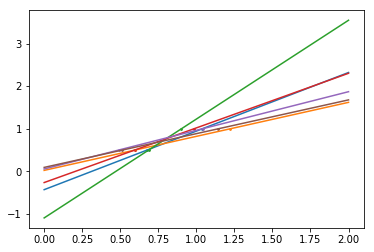

In [50]:
X = np.c_[ .5, 1].T
y = [.5, 1]
test = np.c_[0, 2].T
regr = linear_model.LinearRegression()

import matplotlib.pyplot as plt
plt.figure()

np.random.seed(0)
for _ in range (6):
    this_X = .1 * np.random.normal(size = (2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test))
    plt.scatter(this_X, y, s = 3)

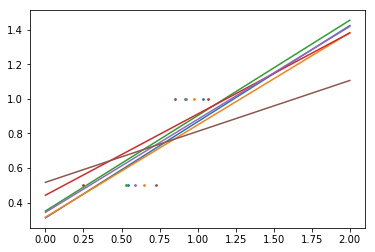

In [53]:
regr = linear_model.Ridge(alpha = 0.1)
plt.figure()

for _ in range(6):
    this_X = 0.1 * np.random.normal(size = (2,1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test))
    plt.scatter(this_X, y, s = 3)

In [54]:
from __future__ import print_function

alphas = np.logspace(-4, -1, 6)
print([regr.set_params(alpha = alpha).fit(diabetes_X_train, diabetes_y_train).score(diabetes_X_test, diabetes_y_test) for alpha in alphas])

[0.585111068388353, 0.5852073015444677, 0.5854677540698492, 0.5855512036503915, 0.5830717085554162, 0.5705899943728011]


In [55]:
regr = linear_model.Lasso()
scores = [regr.set_params(alpha = alpha).fit(diabetes_X_train, diabetes_y_train).score(diabetes_X_test, diabetes_y_test) for alpha in alphas]

best_alpha = alphas[scores.index(max(scores))]
regr.alpha = best_alpha

regr.fit(diabetes_X_train, diabetes_y_train)
print(regr.coef_)

[   0.         -212.43764548  517.19478111  313.77959962 -160.8303982
   -0.         -187.19554705   69.38229038  508.66011217   71.84239008]


In [56]:
log = linear_model.LogisticRegression(solver = 'lbfgs', C = 1e5, multi_class = 'multinomial')
log.fit(iris_X_train, iris_y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

In [57]:
from sklearn import svm
svc = svm.SVC(kernel = 'linear')

svc.fit(iris_X_train, iris_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [58]:
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target
svc = svm.SVC(C = 1, kernel = 'linear')
svc.fit(X_digits[:-100], y_digits[:-100]).score(X_digits[-100:], y_digits[-100:])

0.98

In [61]:
X_folds = np.array_split(X_digits, 7)
y_folds = np.array_split(y_digits, 7)
scores = list()

for k in range(7):
    X_train = list(X_folds)
    X_test = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test = y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(svc.fit(X_train, y_train).score(X_test, y_test))
    
print(scores)

[0.9494163424124513, 0.9610894941634242, 0.9416342412451362, 0.953307392996109, 0.9610894941634242, 0.95703125, 0.93359375]


In [63]:
from sklearn.model_selection import KFold, cross_val_score
X = ["a", "a", "a", "b", "b", "c", "c", "c", "c","c"]
k_fold = KFold(n_splits = 5)
for train_indices, test_indices in k_fold.split(X):
    print('Train: %s | test %s' % (train_indices, test_indices))

Train: [2 3 4 5 6 7 8 9] | test [0 1]
Train: [0 1 4 5 6 7 8 9] | test [2 3]
Train: [0 1 2 3 6 7 8 9] | test [4 5]
Train: [0 1 2 3 4 5 8 9] | test [6 7]
Train: [0 1 2 3 4 5 6 7] | test [8 9]


In [64]:
[svc.fit(X_digits[train], y_digits[train]).score(X_digits[test], y_digits[test]) for train, test in k_fold.split(X_digits)]

[0.9638888888888889,
 0.9222222222222223,
 0.9637883008356546,
 0.9637883008356546,
 0.9303621169916435]

In [66]:
cross_val_score(svc, X_digits, y_digits, cv = k_fold, n_jobs = -1)

array([0.96388889, 0.92222222, 0.9637883 , 0.9637883 , 0.93036212])

In [70]:
cross_val_score(svc, X_digits, y_digits, cv = k_fold, scoring = 'precision_macro')

array([0.96578289, 0.92708922, 0.96681476, 0.96362897, 0.93192644])